<a href="https://colab.research.google.com/github/excit/cpp/blob/master/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Data analysis and experimental workflows

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import glob
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#def reading_csv(route, pattern):
#
#  files_list = glob.glob(os.path.join(route, pattern))
#
#  # Initialize dictionary to hold DataFrames
#  d = {}
#
#  # Loop over the files, ensuring csvs and fns match in length
#  for file_path in files_list:
#      filename = os.path.splitext(os.path.basename(file_path))[0]
#      d[filename] = pd.read_csv(file_path)
#
#  return d

In [4]:
#df_dict = reading_csv("/content/drive/MyDrive/Colab/TUW/EDFDS/ml-32m", "*.csv")
#
#for name, df in df_dict.items():
#    globals()[name] = df
#    print(name)

In [5]:
df_user = pd.read_csv("/content/drive/MyDrive/Colab/TUW/EDFDS/movie_lens/u.data",
                      sep="\t",
                      names=['user id', 'movie id', 'rating', 'timestamp'])
df_user = df_user.drop(['timestamp'], axis=1)

df_user.head(5)

,user id,movie id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [12]:
df_movies = pd.read_csv("/content/drive/MyDrive/Colab/TUW/EDFDS/movie_lens/u.item",
                        sep="|",
                        encoding='latin-1',
                        names=['movie id', 'movie title', 'release date', 'video release date',
                               'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
                               "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                               'Thriller', 'War', 'Western'])
df_movies = df_movies.drop(['video release date', 'IMDb URL'], axis=1)

df_movies['release_date_dt'] = pd.to_datetime(df_movies['release date'], format="%d-%b-%Y")
df_movies['release_year'] = df_movies['release_date_dt'].fillna('01-01-1900').dt.year.astype(int)

df_movies.head(5)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_dt,release_year
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1995-01-01,1995


In [13]:
df_user_info = pd.read_csv("/content/drive/MyDrive/Colab/TUW/EDFDS/movie_lens/u.user",
                           sep="|",
                           encoding='latin-1',
                           names=['user id', 'age', 'gender', 'occupation', 'zip code'])
df_user_info.head(5)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
df_total = df_user.merge(df_user_info, on=['user id'], how='inner')\
                  .merge(df_movies, on=['movie id'], how='inner')

df_total.describe()

,user id,movie id,rating,age,unknown,Action,Adventure,Animation,Children's,Comedy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_dt,release_year
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,99991,100000.000000
mean,462.48475,425.530130,3.529860,32.969850,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,...,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,1988-02-09 00:43:11.369223168,1987.948300
min,1.00000,1.000000,1.000000,7.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1922-01-01 00:00:00,1900.000000
25%,254.00000,175.000000,3.000000,24.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1986-01-01 00:00:00,1986.000000
50%,447.00000,322.000000,4.000000,30.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1994-01-01 00:00:00,1994.000000
75%,682.00000,631.000000,4.000000,40.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1996-09-28 00:00:00,1996.000000
max,943.00000,1682.000000,5.000000,73.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1998-10-23 00:00:00,1998.000000
std,266.61442,330.798356,1.125674,11.562623,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,...,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,NaN,14.179457


In [16]:
df_total.rating.mode()

,rating
0,4


In [17]:
df_total.age.mode()

,age
0,27


In [23]:
df_total[df_total['unknown'] > 0]['unknown'].sum()

10

## Univariate Analysis

In [15]:
df_total.columns

Index(['user id', 'movie id', 'rating', 'age', 'gender', 'occupation',
       'zip code', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release_date_dt', 'release_year'],
      dtype='object')

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

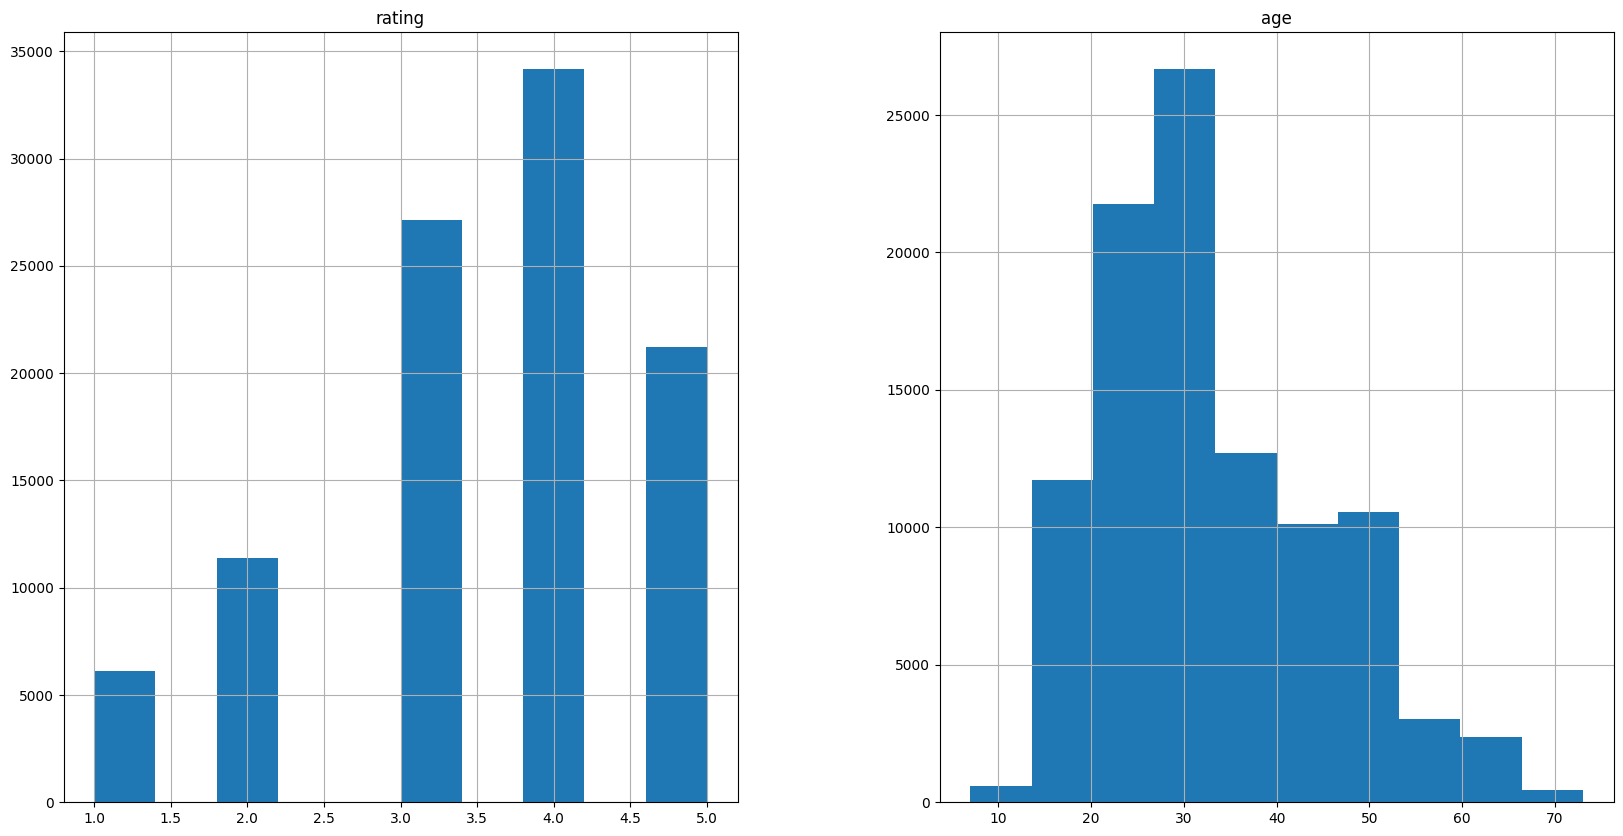

In [ ]:
df_total[['rating', 'age']].hist(figsize=(20,10))

<Axes: >

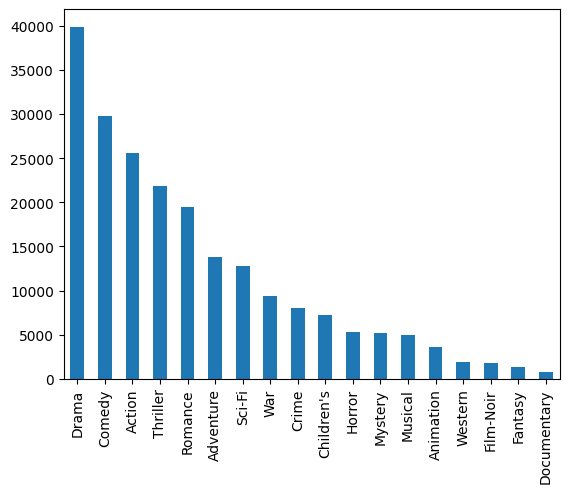

In [ ]:
df_total[['Action',
          'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: >

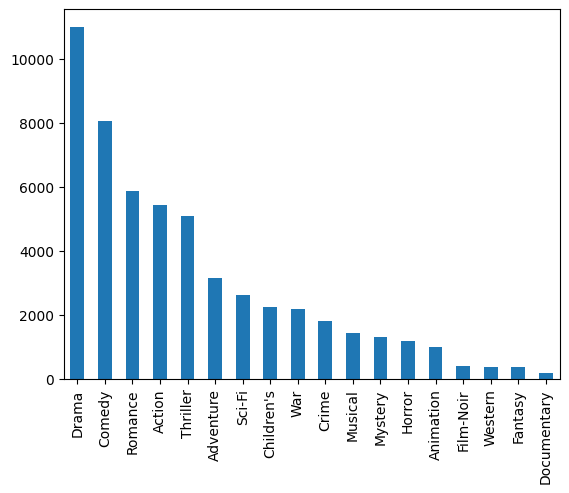

In [24]:
df_total[df_total['gender'] == 'F'][['Action',
                                     'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                                     'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                     'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: >

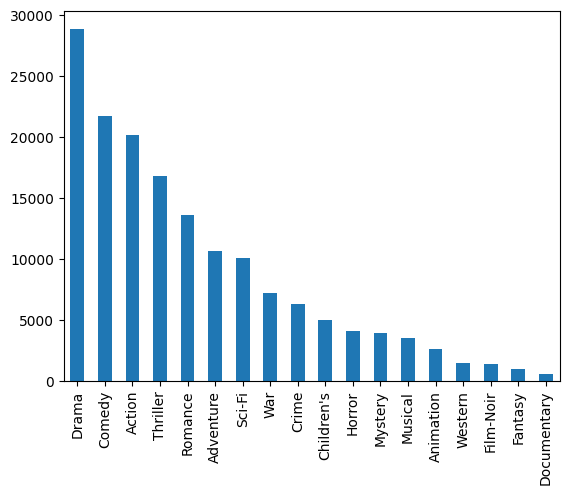

In [25]:
df_total[df_total['gender'] == 'M'][['Action',
                                     'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                                     'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                     'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum().sort_values(ascending=False).plot(kind='bar')

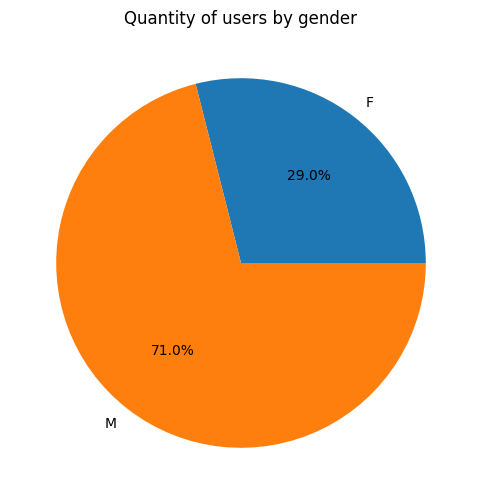

In [ ]:
gender_stat = df_total.groupby('gender').agg(users_qnt=('user id', 'nunique')).reset_index()

# Create a piechart
plt.figure(figsize=(22, 6))
plt.pie(gender_stat['users_qnt'], labels=gender_stat['gender'], autopct='%1.1f%%')

# Add titles and labels
plt.title('Quantity of users by gender')

# Show plot
plt.show()

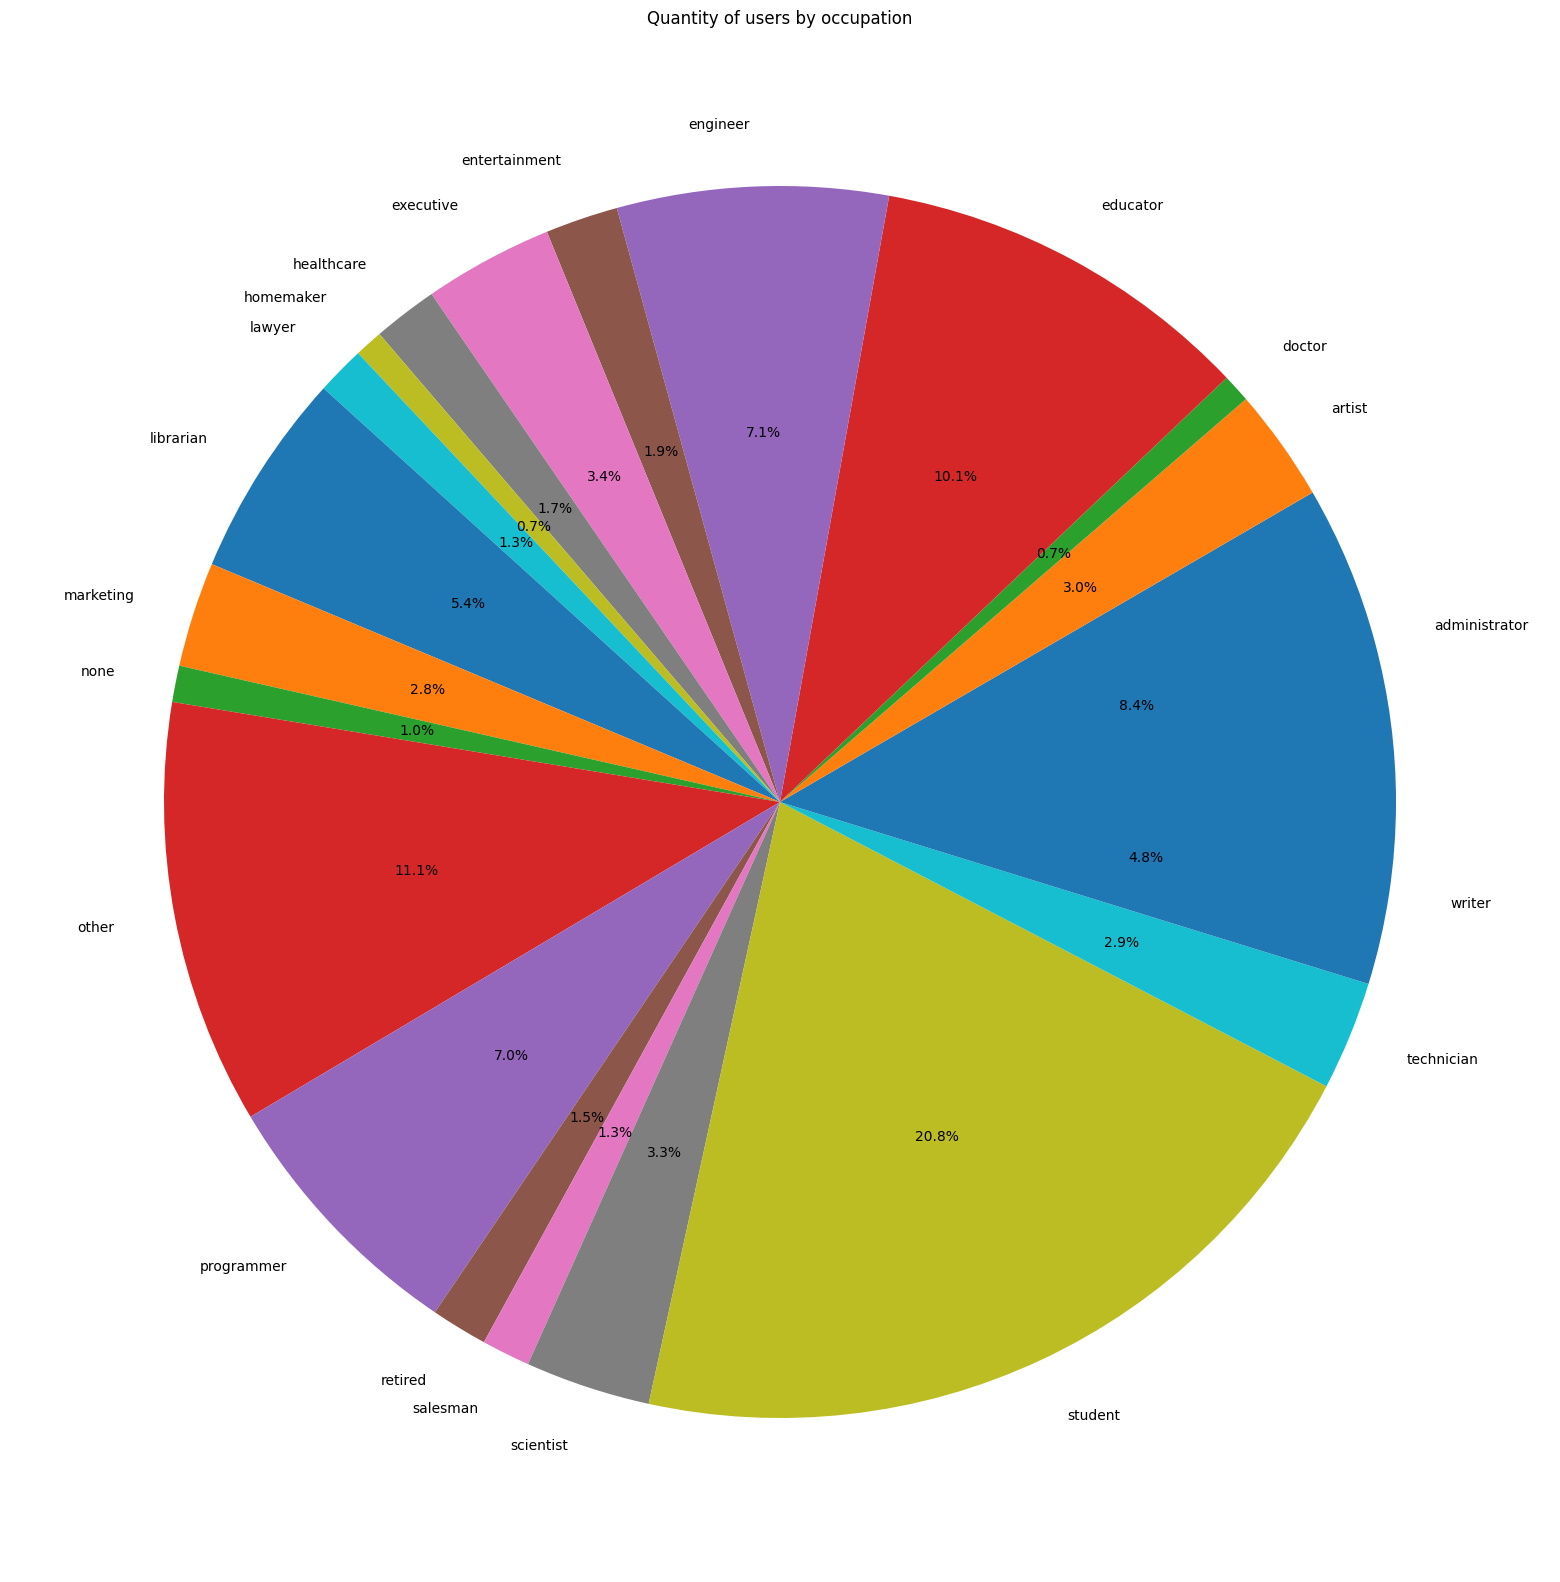

In [36]:
occupation_stat = df_total.groupby('occupation').agg(users_qnt=('user id', 'nunique')).reset_index()

# Create a piechart
plt.figure(figsize=(20, 20))
plt.pie(occupation_stat['users_qnt'], labels=occupation_stat['occupation'], autopct='%1.1f%%')

# Add titles and labels
plt.title('Quantity of users by occupation')

# Show plot
plt.show()

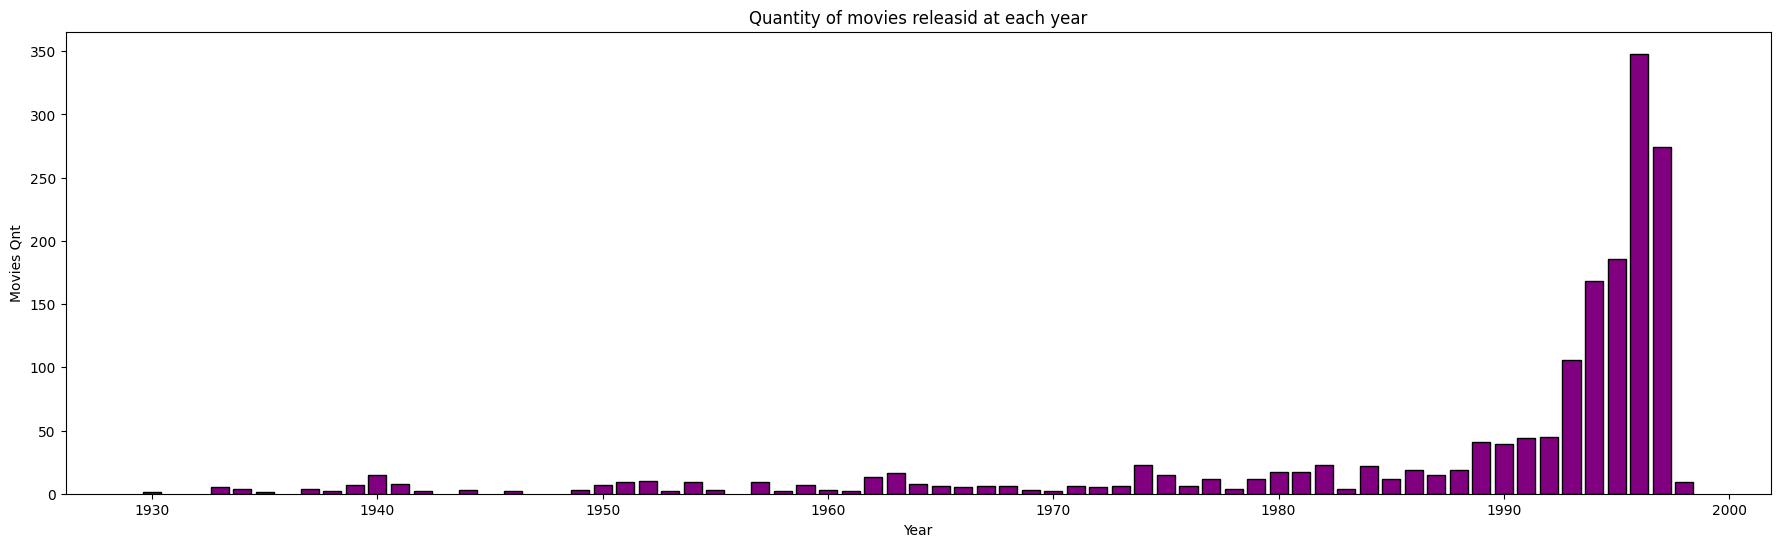

In [ ]:
#visualise the distributions of numerical values in different groups

years_stat = df_total.groupby(['release_year']).agg(movies_qnt=('movie id', 'nunique')).reset_index()

# Create a bar plot
plt.figure(figsize=(22, 6))
plt.bar(years_stat['release_year'], years_stat['movies_qnt'], color='purple', edgecolor='black')

# Add titles and labels
plt.title('Quantity of movies releasid at each year')
plt.xlabel('Year')
plt.ylabel('Movies Qnt')

# Show plot
plt.show()

## Bivariate Analysis

In [ ]:
df_total.corr(numeric_only=True, method = 'pearson')

,user id,movie id,rating,age,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
user id,1.000000,0.010377,-0.009371,-0.073599,-0.006140,0.014076,0.013032,0.005402,0.006757,-0.004215,...,-0.001824,-0.007408,0.005144,0.004022,0.006438,0.007302,0.001300,0.006479,0.000477,-0.002692
movie id,0.010377,1.000000,-0.189124,-0.012612,-0.001449,-0.147563,-0.084092,-0.026971,-0.010476,0.018643,...,0.022377,-0.012053,-0.022761,0.010255,-0.009429,-0.169519,-0.048885,-0.111135,-0.017703,-0.004364
rating,-0.009371,-0.189124,1.000000,0.054460,-0.002930,-0.025847,-0.009342,0.008047,-0.043644,-0.078653,...,0.046206,-0.050413,-0.001716,0.022630,0.040107,0.010471,-0.009802,0.081815,0.010184,0.020510
age,-0.073599,-0.012612,0.054460,1.000000,-0.004817,-0.063920,-0.034052,-0.034667,-0.028196,-0.027367,...,0.032774,-0.038826,0.001189,0.027750,0.017585,-0.039955,-0.033085,0.035203,0.009527,-0.002779
unknown,-0.006140,-0.001449,-0.002930,-0.004817,1.000000,-0.005864,-0.003993,-0.001934,-0.002782,-0.006521,...,-0.001328,-0.002370,-0.002283,-0.002353,-0.004916,-0.003819,-0.005291,-0.003221,-0.001374,0.002374
Action,0.014076,-0.147563,-0.025847,-0.063920,-0.005864,1.000000,0.451525,-0.099022,-0.144838,-0.223283,...,-0.077876,-0.007718,-0.091214,-0.032807,-0.018748,0.323875,0.249647,0.166665,0.063467,0.069129
Adventure,0.013032,-0.084092,-0.009342,-0.034052,-0.003993,0.451525,1.000000,-0.024734,0.100567,-0.113014,...,-0.053030,-0.058654,-0.024798,-0.043676,-0.018516,0.294811,-0.049453,0.087115,0.010551,0.038873
Animation,0.005402,-0.026971,0.008047,-0.034667,-0.001934,-0.099022,-0.024734,1.000000,0.555386,0.029612,...,-0.025682,-0.028374,0.417647,-0.045498,-0.085441,-0.044729,-0.077146,-0.056401,-0.026579,0.004797
Children's,0.006757,-0.010476,-0.043644,-0.028196,-0.002782,-0.144838,0.100567,0.555386,1.000000,0.082916,...,-0.036940,-0.065918,0.381293,-0.055021,-0.119323,-0.042213,-0.144181,-0.085342,-0.031054,-0.009259
Comedy,-0.004215,0.018643,-0.078653,-0.027367,-0.006521,-0.223283,-0.113014,0.029612,0.082916,1.000000,...,-0.086590,-0.074051,0.035065,-0.111346,0.095863,-0.145618,-0.290535,-0.119817,0.002417,-0.050278


In [ ]:
df_total.columns

Index(['user id', 'movie id', 'rating', 'age', 'gender', 'occupation',
       'zip code', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release_date_dt', 'release_year'],
      dtype='object')

In [ ]:
df_total.gender.unique()

array(['M', 'F'], dtype=object)

In [ ]:
df_total_for_correlation = df_total.copy()

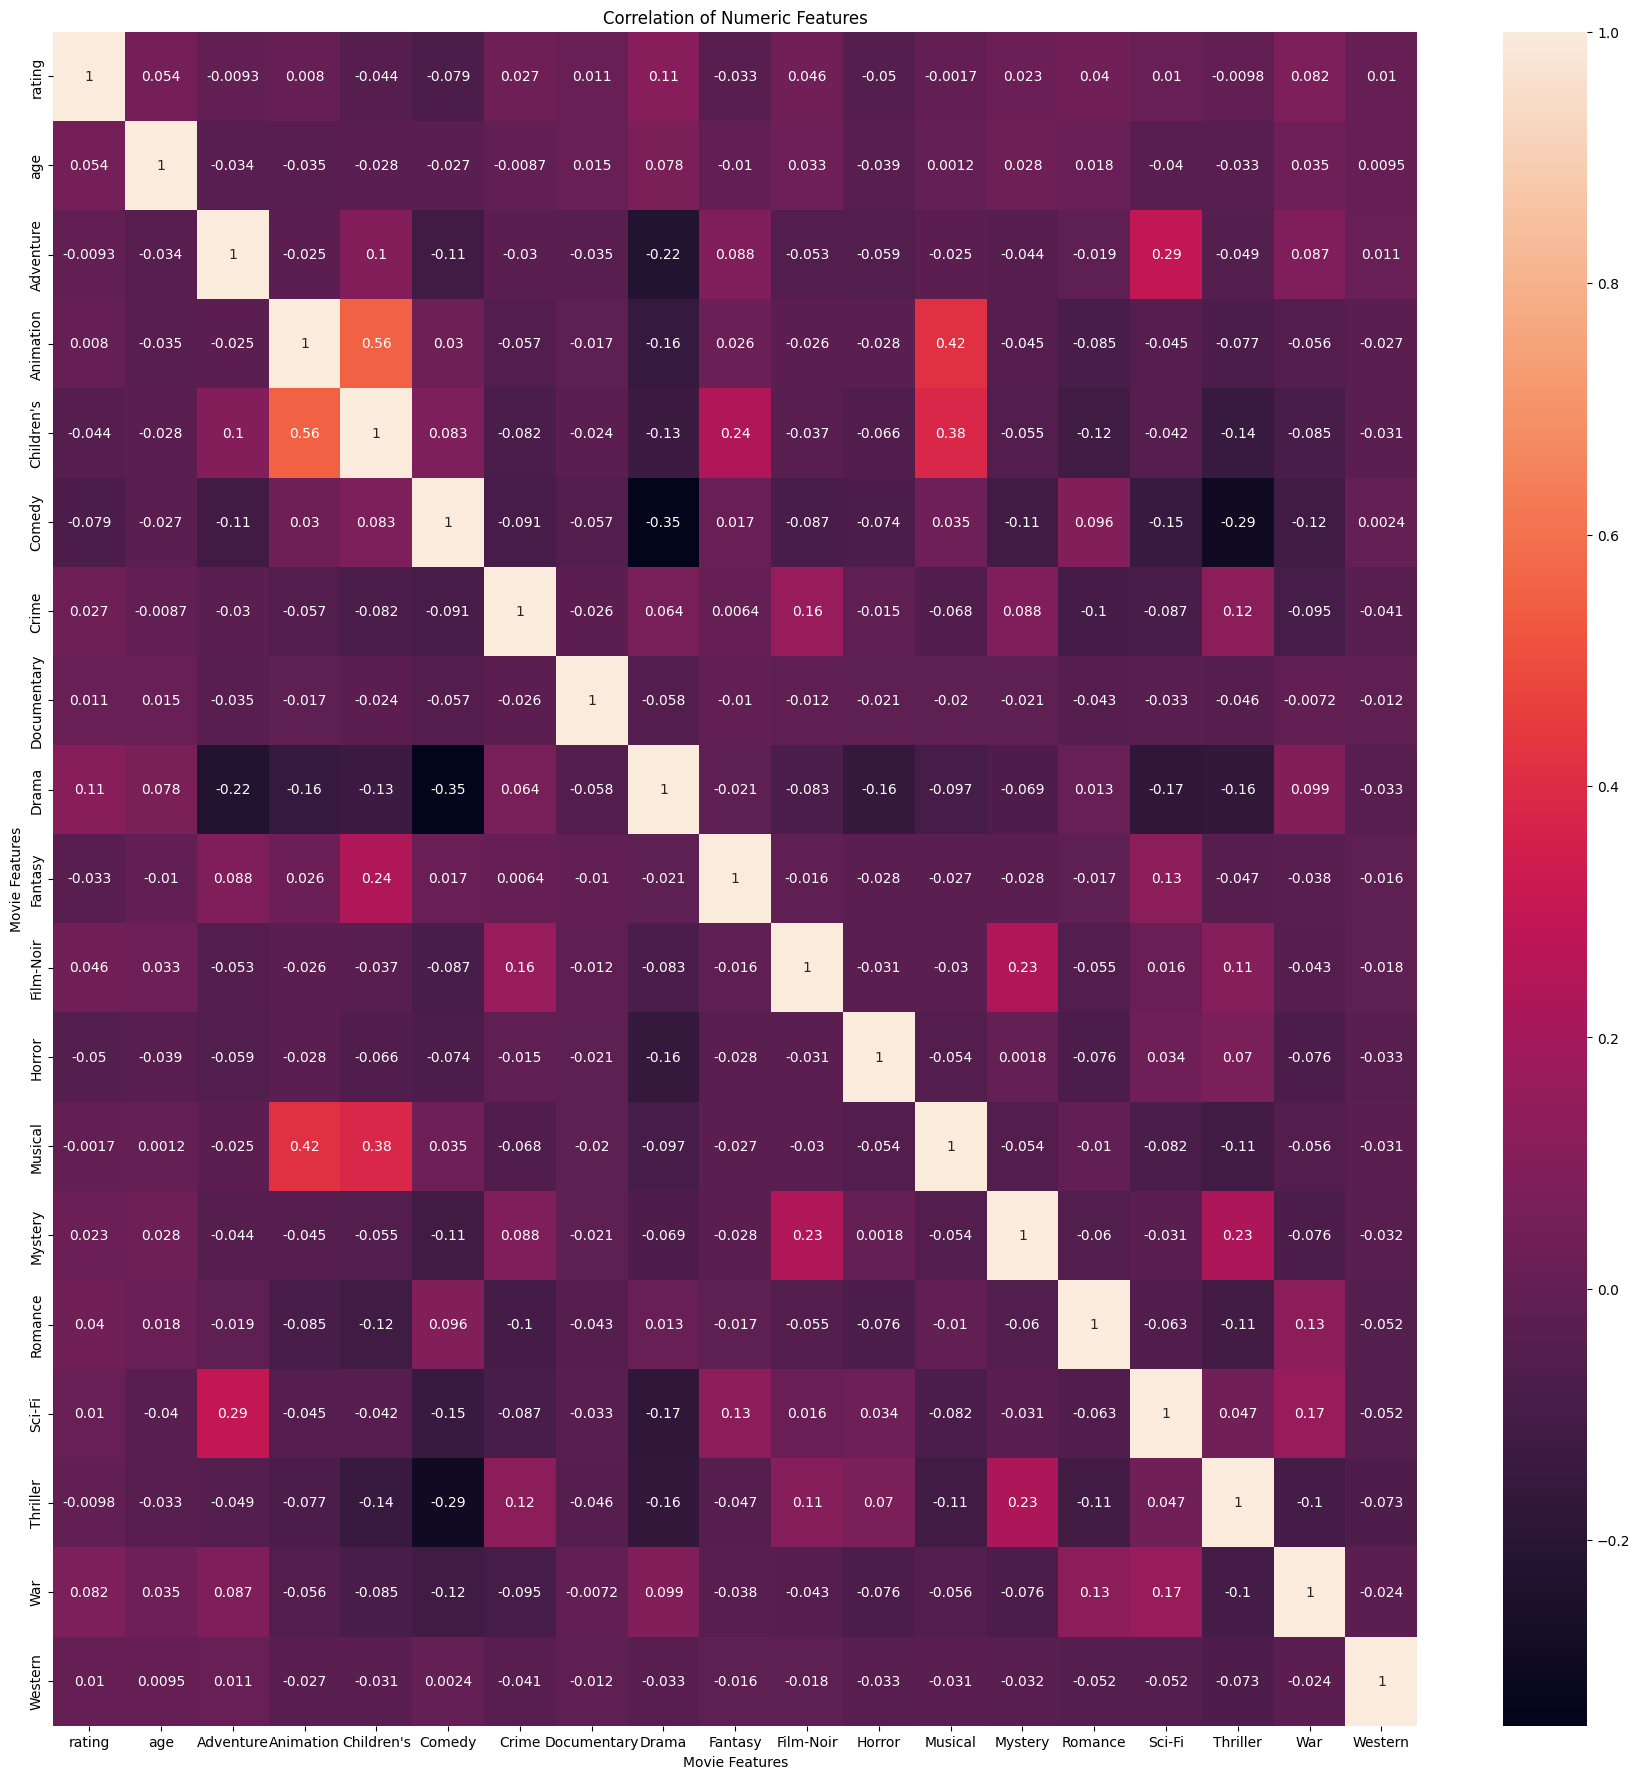

In [ ]:
correlation_matrix = df_total_for_correlation[['rating', 'age',
                                               'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                                               'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                               'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].corr(method = 'pearson')

plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation of Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

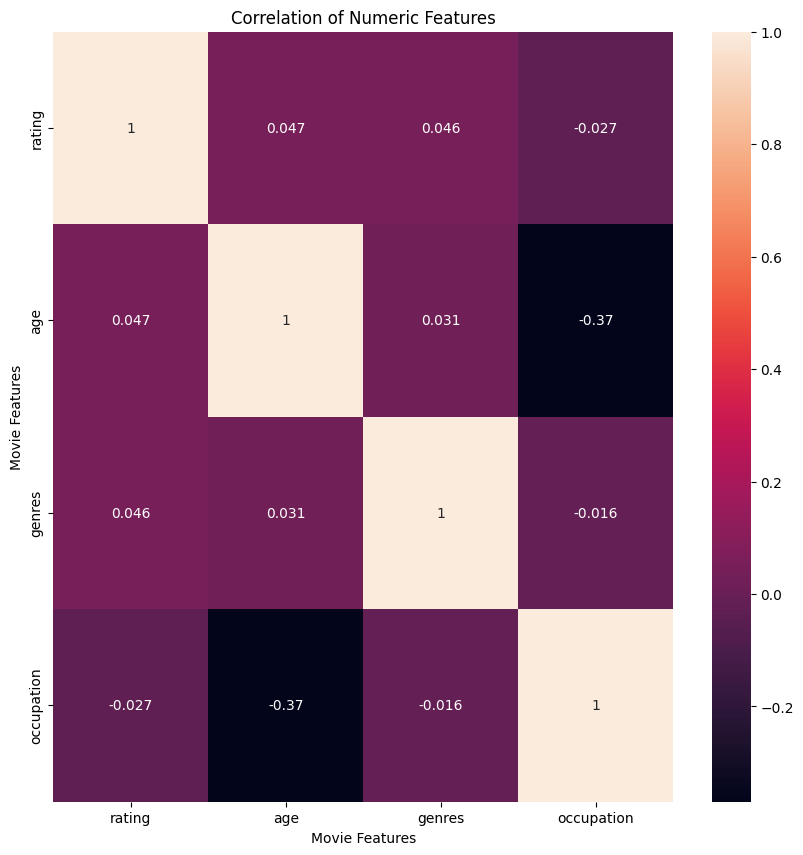

In [ ]:
import scipy.stats as stats
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_total_for_correlation_genre['genres']= le.fit_transform(df_total_for_correlation_genre['genres'])
df_total_for_correlation_genre['occupation']= le.fit_transform(df_total_for_correlation_genre['occupation'])

correlation_matrix = df_total_for_correlation_genre[['rating', 'age', 'genres', 'occupation']].corr(method = 'pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation of Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Age vs. Rating')

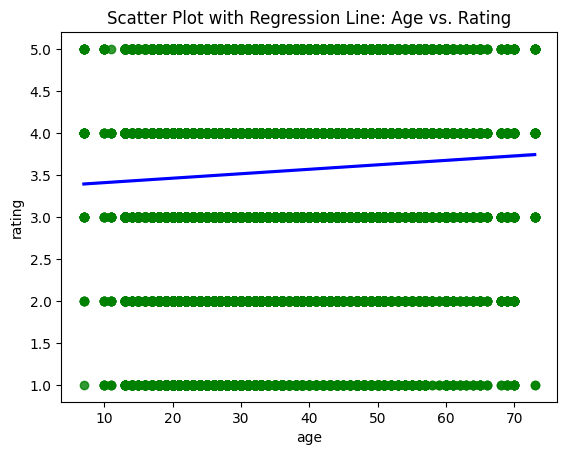

In [ ]:
# age vs rating
sns.regplot(x = 'age',
            y = 'rating',
            data= df_total,
            scatter_kws = {'color': 'green'},
            line_kws = {'color': 'blue'})

plt.title('Scatter Plot with Regression Line: Age vs. Rating')

In [ ]:
import scipy.stats as stats
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_total_for_correlation['gender']= le.fit_transform(df_total_for_correlation['gender'])

stats.pointbiserialr(df_total_for_correlation['gender'], df_total_for_correlation['rating'])

SignificanceResult(statistic=-0.0008616098918550552, pvalue=0.7852671011802661)

In [ ]:
df_total_for_correlation['occupation']= le.fit_transform(df_total_for_correlation['occupation'])
stats.pointbiserialr(df_total_for_correlation['occupation'], df_total_for_correlation['rating'])

SignificanceResult(statistic=-0.027198794534620492, pvalue=7.799962051887983e-18)

In [ ]:
stats.pointbiserialr(df_total_for_correlation['rating'], df_total_for_correlation['release_year'])

SignificanceResult(statistic=0.020510117200803486, pvalue=8.787093451333579e-11)

In [ ]:
stats.pointbiserialr(df_total_for_correlation['gender'], df_total_for_correlation['occupation'])

SignificanceResult(statistic=0.017354452014344622, pvalue=4.0581061293240465e-08)

In [ ]:
from scipy.stats import f_oneway

f_oneway(df_total_for_correlation['rating'], df_total_for_correlation['occupation'])

F_onewayResult(statistic=126191.62246836386, pvalue=0.0)

In [ ]:
df_total

,user id,movie id,rating,age,gender,occupation,zip code,movie title,release date,unknown,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_dt,release_year
0,196,242,3,49,M,writer,55105,Kolya (1996),24-Jan-1997,0,...,0,0,0,0,0,0,0,0,1996-04-19,1996
1,186,302,3,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,0,...,0,0,1,0,0,1,0,0,1993-01-01,1993
2,22,377,1,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,0,...,0,0,0,0,0,0,0,0,1997-07-11,1997
3,244,51,2,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,0,...,0,0,0,1,0,0,1,1,1997-02-14,1997
4,166,346,1,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,0,...,0,0,0,0,0,0,0,0,1933-01-01,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,13,M,student,83702,"First Wives Club, The (1996)",14-Sep-1996,0,...,0,0,0,0,0,0,0,0,1970-01-01,1970
99996,716,204,5,36,F,administrator,44265,Back to the Future (1985),01-Jan-1985,0,...,0,0,0,0,1,0,0,0,1994-01-01,1994
99997,276,1090,1,21,M,student,95064,Sliver (1993),01-Jan-1993,0,...,0,0,0,0,0,1,0,0,1985-01-01,1985
99998,13,225,2,47,M,educator,29206,101 Dalmatians (1996),27-Nov-1996,0,...,0,0,0,0,0,0,0,0,1957-01-01,1957


In [ ]:
df_total.melt(id_vars=["user id", "movie id", 'rating', 'age', 'gender', 'release date',
                       'occupation', 'zip code', 'movie title', 'release_date_dt', 'release_year'],
            var_name="genres",
            value_name="fact")

In [ ]:
df_total_for_correlation_genre = df_total.copy()

df_total_for_correlation_genre = df_total.melt(id_vars=["user id", "movie id", 'rating', 'age', 'gender', 'release date',
                                                        'occupation', 'zip code', 'movie title', 'release_date_dt', 'release_year'],
                                             var_name="genres",
                                             value_name="fact")

df_total_for_correlation_genre = df_total_for_correlation_genre[df_total_for_correlation_genre['fact'] != 0]

In [ ]:
contingency_table = pd.crosstab(df_total_for_correlation_genre['genres'], df_total_for_correlation_genre['age'])
contingency_table

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square: 4929.922639885373
p-value: 0.0
Degrees of freedom: 1080
Expected frequencies:
 [[1.37216115e+01 1.03513911e+01 7.34226581e+00 ... 3.33411087e+01
  3.53873139e+01 1.43234366e+01]
 [7.37478304e+00 5.56343282e+00 3.94615584e+00 ... 1.79194290e+01
  1.90191773e+01 7.69823843e+00]
 [1.93311226e+00 1.45831275e+00 1.03438463e+00 ... 4.69712364e+00
  4.98539476e+00 2.01789788e+00]
 ...
 [5.03949764e+00 3.80172629e+00 2.69657330e+00 ... 1.22450951e+01
  1.29965992e+01 5.26052823e+00]
 [9.94172017e-01 7.49989416e-01 5.31969237e-01 ... 2.41566359e+00
  2.56391731e+00 1.03777605e+00]
 [5.36230861e-03 4.04525036e-03 2.86930549e-03 ... 1.30294692e-02
  1.38291117e-02 5.59749759e-03]]


In [ ]:
contingency_table = pd.crosstab(df_total_for_correlation_genre['genres'], df_total_for_correlation_genre['occupation'])
# Perform Chi-square test%
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square: 3019.8704211030736
p-value: 0.0
Degrees of freedom: 360
Expected frequencies:
 [[1.90585962e+03 5.99658496e+02 1.34808815e+02 2.34158097e+03
  2.13623826e+03 5.26356203e+02 8.41471808e+02 6.67423999e+02
  8.01630988e+01 3.32207437e+02 1.29091477e+03 5.04810866e+02
  2.37359806e+02 2.72662865e+03 2.05029764e+03 3.89380818e+02
  2.14490454e+02 5.45133145e+02 5.74129077e+03 9.25005127e+02
  1.39791926e+03]
 [1.02431855e+03 3.22290957e+02 7.24540088e+01 1.25850026e+03
  1.14813728e+03 2.82894090e+02 4.52255335e+02 3.58712035e+02
  4.30842588e+01 1.78547379e+02 6.93811825e+02 2.71314387e+02
  1.27570808e+02 1.46544702e+03 1.10194784e+03 2.09275641e+02
  1.15279503e+02 2.92985898e+02 3.08569979e+03 4.97150944e+02
  7.51322195e+02]
 [2.68499118e+02 8.44803970e+01 1.89919801e+01 3.29883911e+02
  3.00955055e+02 7.41535078e+01 1.18547261e+02 9.40272584e+01
  1.12934453e+01 4.68016651e+01 1.81865166e+02 7.11181825e+01
  3.34394506e+01 3.84129754e+02 2.88847668e+02 5.48562995e+01
  3.0

In [ ]:
contingency_table = pd.crosstab(df_total_for_correlation_genre['genres'], df_total_for_correlation_genre['rating'])
# Perform Chi-square test%
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square: 3181.5424738327965
p-value: 0.0
Degrees of freedom: 72
Expected frequencies:
 [[1.46640696e+03 2.89044543e+03 6.89234139e+03 8.75559180e+03
  5.58421443e+03]
 [7.88131419e+02 1.55349158e+03 3.70434058e+03 4.70575849e+03
  3.00127793e+03]
 [2.06588654e+02 4.07208401e+02 9.70998895e+02 1.23349519e+03
  7.86708860e+02]
 [4.11572737e+02 8.11254018e+02 1.93445605e+03 2.45740984e+03
  1.56730736e+03]
 [1.70955693e+03 3.36972012e+03 8.03518420e+03 1.02073866e+04
  6.51015220e+03]
 [4.61601002e+02 9.09865096e+02 2.16959670e+03 2.75611755e+03
  1.75781966e+03]
 [4.34380583e+01 8.56210729e+01 2.04165648e+02 2.59359044e+02
  1.65416176e+02]
 [2.28622867e+03 4.50640198e+03 1.07456313e+04 1.36505661e+04
  8.70617197e+03]
 [7.74779087e+01 1.52717270e+02 3.64158254e+02 4.62603467e+02
  2.95043101e+02]
 [9.93115501e+01 1.95753720e+02 4.66779774e+02 5.92967313e+02
  3.78187643e+02]
 [3.04696776e+02 6.00590033e+02 1.43212236e+03 1.81927709e+03
  1.16031373e+03]
 [2.83894645e+02 5.59586801e+0